### Show Mapping Results

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path_mapping_stats = "../../data/mapping_stats_2pass/"

In [2]:
def LogParser(file_path:str) -> pd.DataFrame:
    """Parse out Single Log

    Args:
        file_path (str): path for log file

    Returns:
        pd.DataFrame: a dataframe that stores parsed log data
    """
    
    row_name = file_path.split('/')[-1][:-14]
    
    with open(file_path, 'r') as log:
        cols = []
        rows = []
        
        idx = 0
        while True:
            line = log.readline().strip()  # remove heading and tailing whitespaces
            
            if idx < 5:  # skip first 5 lines (useless info)
                idx += 1
                continue
            
            if not line:  # empty line below 5th line means end of file
                break
            
            if '|' not in line:  # line without '|' means simple informative row
                continue
            
            col, row = line.split('|')
            cols.append(col.strip())  # remove heading and tailing whitespaces
            rows.append(row.strip())  # remove heading and tailing whitespaces
    
    return pd.DataFrame({c:r for c, r in zip(cols, rows)}, index=[row_name])

In [3]:
def MultiLogParser(file_path: str) -> pd.DataFrame:
    """Parse out Multiple Log files=

    Args:
        file_path (str): path where all the log files are in

    Returns:
        pd.DataFrame: a dataframe that contains all the information of log files
    """
    
    res_df = pd.DataFrame()  # empty dataframe
    
    fnames = os.listdir(file_path)
    
    for fname in fnames:
        fpath = os.path.join(file_path, fname)
        res_df = pd.concat([res_df, LogParser(fpath)])
    
    return res_df

In [4]:
mapping_stats = MultiLogParser(path_mapping_stats)
mapping_stats.sort_index(inplace=True)

In [5]:
mapping_stats.head()

,Number of input reads,Average input read length,Uniquely mapped reads number,Uniquely mapped reads %,Average mapped length,Number of splices: Total,Number of splices: Annotated (sjdb),Number of splices: GT/AG,Number of splices: GC/AG,Number of splices: AT/AC,...,Number of reads mapped to too many loci,% of reads mapped to too many loci,Number of reads unmapped: too many mismatches,% of reads unmapped: too many mismatches,Number of reads unmapped: too short,% of reads unmapped: too short,Number of reads unmapped: other,% of reads unmapped: other,Number of chimeric reads,% of chimeric reads
CCI4_1x_4,52412998,201,44523154,84.95%,200.98,27888396,27859414,27644384,212711,13409,...,102305,0.20%,0,0.00%,1566278,2.99%,325180,0.62%,0,0.00%
CCI4_1x_6,64622725,201,52466365,81.19%,200.62,33446588,33400107,33146634,253033,16715,...,109004,0.17%,0,0.00%,4137571,6.40%,574642,0.89%,0,0.00%
CCI4_1x_9,56679431,201,46860370,82.68%,200.81,31128943,31103070,30848081,243706,15129,...,105617,0.19%,0,0.00%,2896910,5.11%,255388,0.45%,0,0.00%
CCI4_3x_2,56709978,201,46177111,81.43%,200.90,29902198,29876398,29631934,236187,12394,...,133055,0.23%,0,0.00%,2876273,5.07%,217958,0.38%,0,0.00%
CCI4_3x_5,56879454,201,47593658,83.67%,200.92,31325761,31299274,31040622,246775,15271,...,142645,0.25%,0,0.00%,2340089,4.11%,201943,0.36%,0,0.00%


In [6]:
mapping_stats_core = mapping_stats[
    ['Uniquely mapped reads %',
     '% of reads mapped to multiple loci',
     '% of reads mapped to too many loci',
     '% of reads unmapped: too short',
     '% of reads unmapped: other']
].copy()

for column in mapping_stats_core.columns:
    mapping_stats_core[column] = mapping_stats_core[column].map(lambda x: float(x[:-1]))

mapping_stats_summary = mapping_stats_core.copy()

mapping_stats_summary.columns = [
    'uniquely_mapped',
    'multiple_loci',
    'too_many_loci',
    'too_short_loci',
    'other_reason'
]

mapping_stats_summary['multi_mapped'] = mapping_stats_summary['multiple_loci'] + mapping_stats_summary['too_many_loci']
mapping_stats_summary['unmapped'] = mapping_stats_summary['too_short_loci'] + mapping_stats_summary['other_reason']

mapping_stats_summary = mapping_stats_summary.drop(['multiple_loci', 
                                                    'too_many_loci',
                                                    'too_short_loci',
                                                    'other_reason'],
                                                   axis=1)

mapping_stats_summary.head()

,uniquely_mapped,multi_mapped,unmapped
CCI4_1x_4,84.95,11.45,3.61
CCI4_1x_6,81.19,11.52,7.29
CCI4_1x_9,82.68,11.77,5.56
CCI4_3x_2,81.43,13.11,5.45
CCI4_3x_5,83.67,11.86,4.47


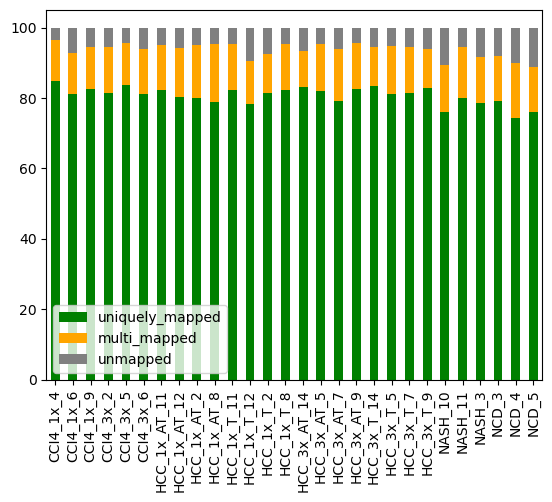

In [7]:
mapping_stats_summary.plot(kind='bar', stacked=True, color=['green', 'orange', 'grey']);

In [8]:
mapping_stats_summary_sorted = mapping_stats_summary.sort_values(by='uniquely_mapped', ascending=False)
mapping_stats_summary_sorted.head()

,uniquely_mapped,multi_mapped,unmapped
CCI4_1x_4,84.95,11.45,3.61
CCI4_3x_5,83.67,11.86,4.47
HCC_3x_T_14,83.51,10.92,5.57
HCC_3x_AT_14,83.17,10.27,6.56
HCC_3x_T_9,82.81,11.24,5.95


In [9]:
mapping_stats_summary_sorted.tail(10)

,uniquely_mapped,multi_mapped,unmapped
HCC_1x_AT_2,80.09,14.92,4.99
NASH_11,80.00,14.48,5.52
HCC_3x_AT_7,79.17,14.66,6.17
NCD_3,79.05,12.97,7.98
HCC_1x_AT_8,78.75,16.62,4.63
NASH_3,78.47,13.07,8.46
HCC_1x_T_12,78.16,12.22,9.62
NASH_10,76.08,13.31,10.61
NCD_5,75.98,12.90,11.12
NCD_4,74.40,15.45,10.15


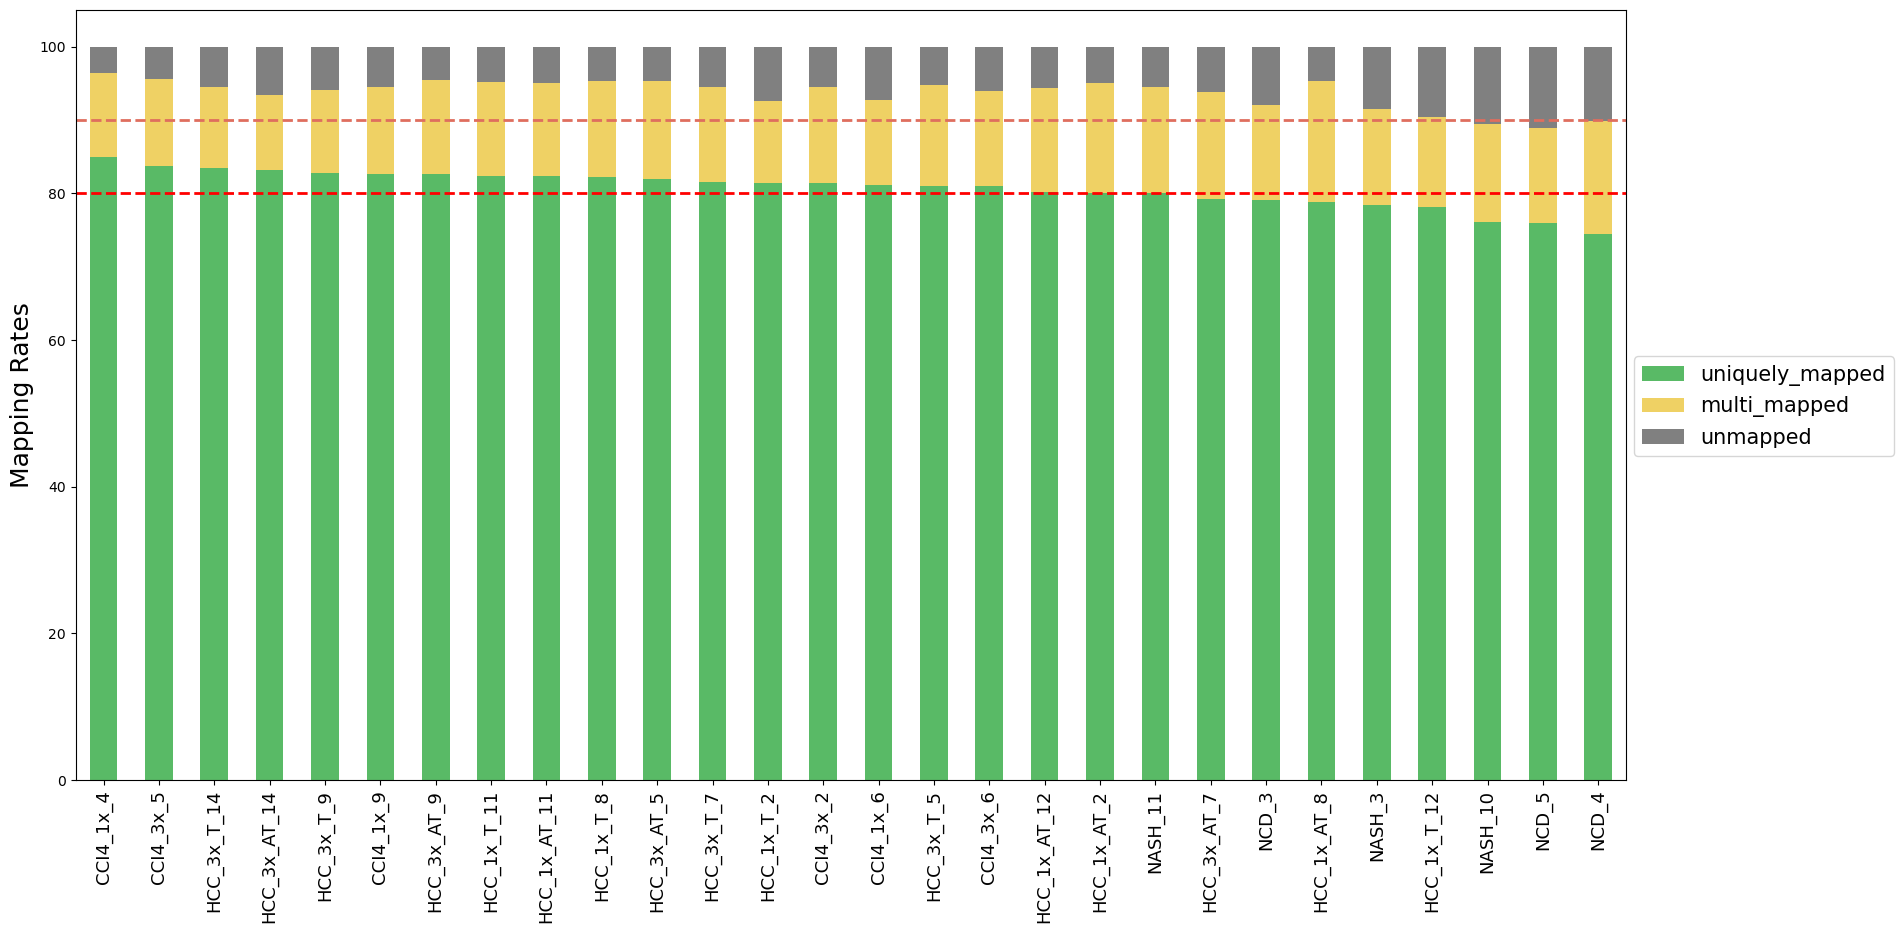

In [10]:
plot = mapping_stats_summary_sorted.plot(kind='bar', stacked=True, color=['#59BA66', '#EFD164', 'grey'], figsize=(20, 10))
plot.axhline(90, color='#DF6E5E', linewidth=2, linestyle='--')
plot.axhline(80, color='red', linewidth=2, linestyle='--')
plt.xticks(fontsize=13)
plt.ylabel("Mapping Rates", fontsize=18)
plt.legend(bbox_to_anchor=(1.005, 0.55), loc='upper left', borderaxespad=0, fontsize=15);

### Show Sample Quality

In [115]:
import numpy as np

path_rsem_result = "../../data/rsem_result/"

In [116]:
def CountExtractor(file_path: str) -> list:
    """Extract count values from rsem results

    Args:
        file_path (str): a path where all the rsem results are in

    Returns:
        list: a list containing dataframes of expected_count, tpm, fpkm
    """
    
    cnt_df = pd.DataFrame()
    tpm_df = pd.DataFrame()
    fpkm_df = pd.DataFrame()
    
    rsem_results = os.listdir(file_path)
    
    first = True
    for rsem in rsem_results:
        temp = pd.read_csv(os.path.join(file_path, rsem), sep='\t')
        temp.index = temp['gene_id']
        
        if first:
            first = False
        else:
            if all(temp.index != cnt_df.index):
                print("Error, Index not matching!!\n")
                break
        
        name = rsem[:-14]
        
        cnt_df[name] = temp['expected_count']
        tpm_df[name] = temp['TPM']
        fpkm_df[name] = temp['FPKM']
    
    return [cnt_df, tpm_df, fpkm_df, temp['length']]

In [117]:
cnt, tpm, fpkm, length = CountExtractor(path_rsem_result)

#### Test Plots

/Users/jigsaw-0/mambaforge/envs/ML/lib/python3.8/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


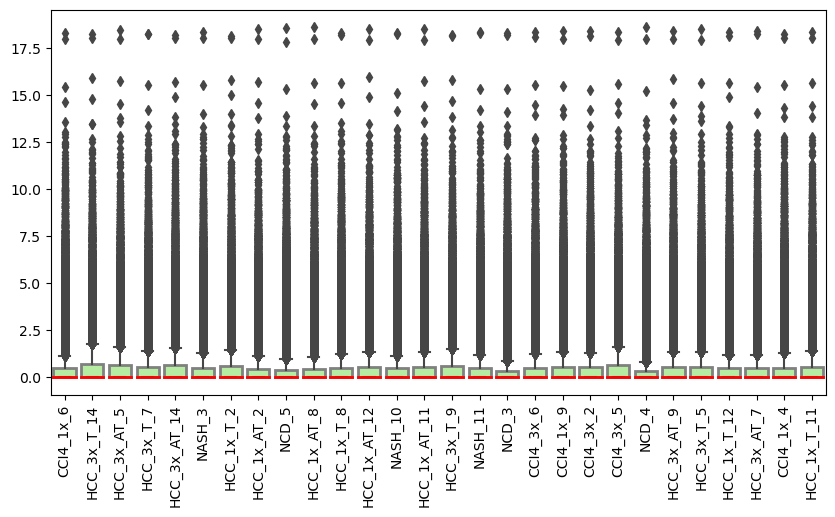

In [17]:
log_tpm = np.log2(tpm+1)
#plt.ylim([0, 1])
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
boxpl = sns.boxplot(data=log_tpm,
                    boxprops={'edgecolor':'grey', 'facecolor': '#B6ECA2', 'linewidth':2},
                    medianprops={'color':'red', 'linewidth':2});

/Users/jigsaw-0/mambaforge/envs/ML/lib/python3.8/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


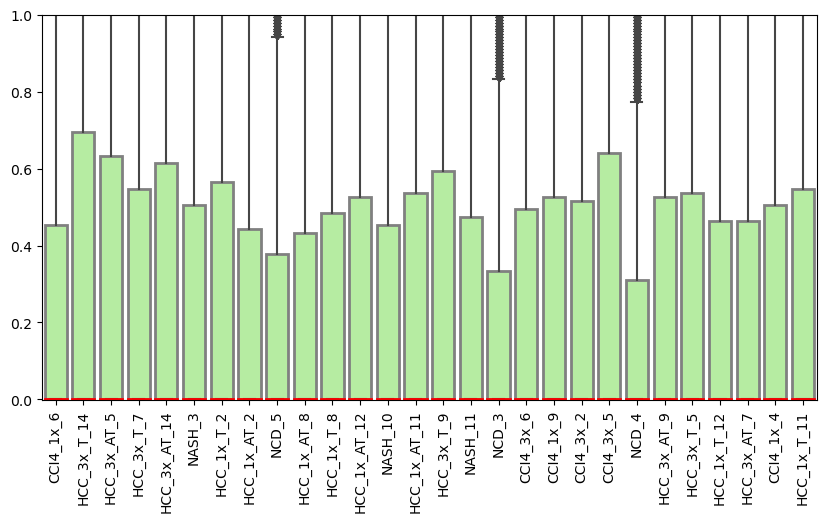

In [18]:
plt.figure(figsize=(10, 5))
plt.ylim([-0.0001, 1])
plt.xticks(rotation=90)
boxpl = sns.boxplot(data=log_tpm,
                    boxprops={'edgecolor':'grey', 'facecolor': '#B6ECA2', 'linewidth':2},
                    medianprops={'color':'red', 'linewidth':2})

(0.0, 1.0)

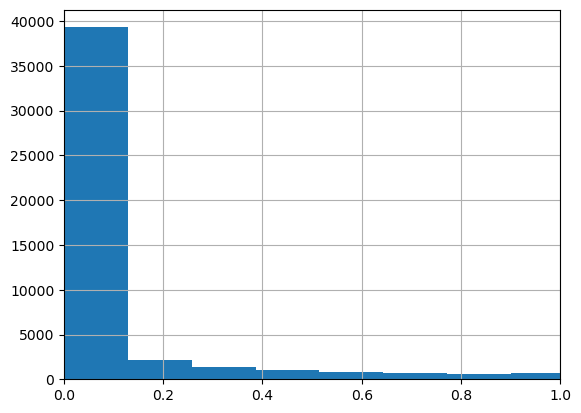

In [19]:
np.log(tpm['NCD_5']+1).hist(bins=100)
plt.xlim([0, 1])

#### Let's filter TPM values with MAD

In [120]:
from statsmodels.robust import mad

In [121]:
#filtered_tpm = tpm[(tpm >= 1).sum(axis=1) == 28]
filtered_tpm = tpm[(tpm > 3).sum(axis=1) >= 14]  # remove low counts

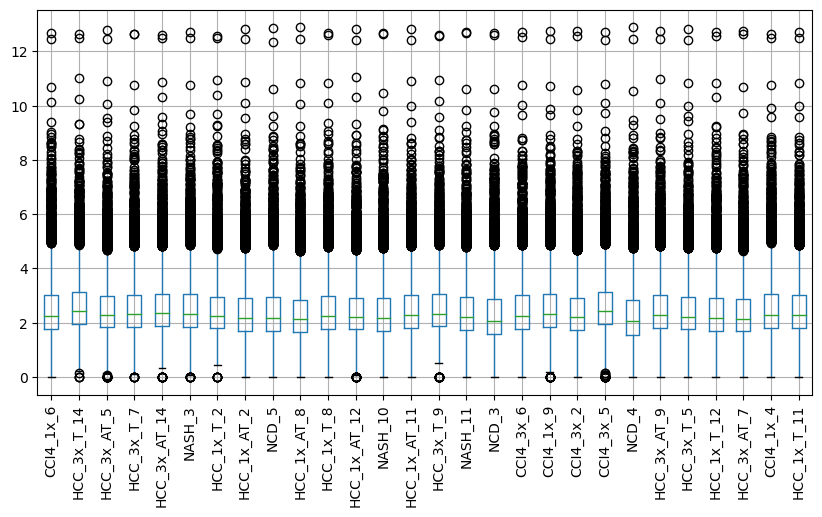

In [124]:
np.log(filtered_tpm+1).boxplot(figsize=(10, 5))
plt.xticks(rotation=90);

In [127]:
filtered_idx = set()
for col in filtered_tpm.columns:
    criteria = (filtered_tpm[col] >= np.median(filtered_tpm[col]) - 3*mad(filtered_tpm[col])) & \
        (filtered_tpm[col] <= np.median(filtered_tpm[col]) + 3*mad(filtered_tpm[col]))
    tmp_idx = filtered_tpm[col][criteria].index
    
    if not filtered_idx:
        filtered_idx = set(tmp_idx)
    else:
        filtered_idx = filtered_idx & set(tmp_idx)

mad_filtered_tpm = filtered_tpm.loc[list(filtered_idx), :]

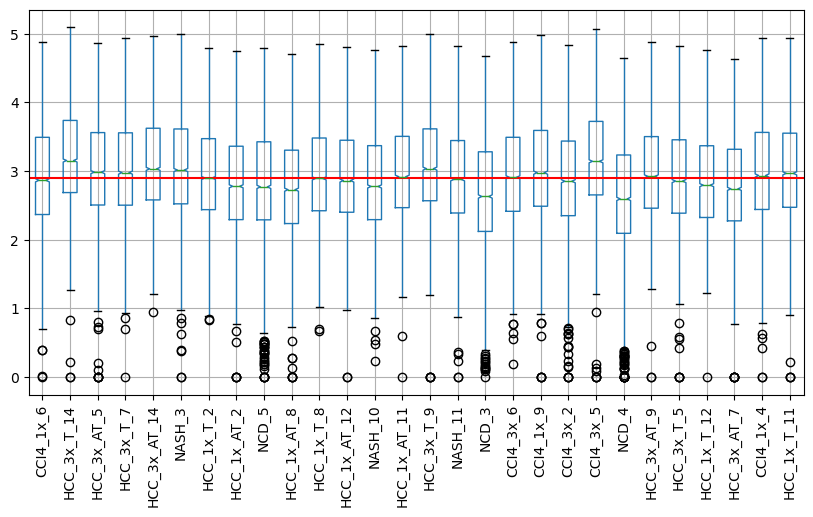

In [128]:
np.log2(mad_filtered_tpm+1).boxplot(figsize=(10, 5), notch=True)
plt.xticks(rotation=90)
plt.axhline(np.mean(np.median(np.log2(mad_filtered_tpm+1))), color='red');

#### Let's start over from the expected count values

/Users/jigsaw-0/mambaforge/envs/ML/lib/python3.8/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


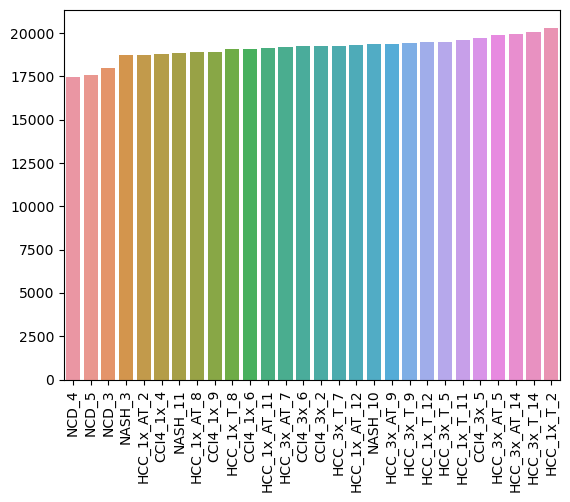

In [35]:
sns.barplot(pd.DataFrame((cnt > 5).sum(axis=0).sort_values(ascending=True)).transpose())
plt.xticks(rotation=90);

In [129]:
pd.DataFrame((cnt > 3).sum(axis=1).sort_values(ascending=True)).head()

,0
gene_id,
ENSMUSG00002076992.1,0
ENSMUSG00000074547.5,0
ENSMUSG00000100916.4,0
ENSMUSG00000100917.2,0
ENSMUSG00000100918.2,0


In [37]:
cnt_filt1 = cnt[(cnt > 3).sum(axis=1) > 0]
cnt_filt1.shape

(29001, 28)

<AxesSubplot: >

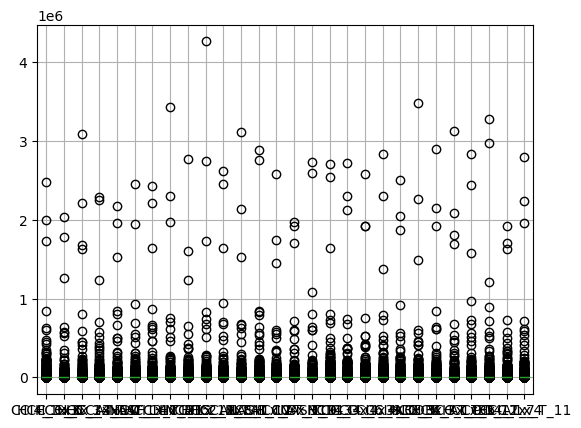

In [38]:
cnt_filt1.boxplot()

In [ ]:
pd.DataFrame((cnt_filt1 > 3).sum(axis=1).sort_values(ascending=True)).value_counts()

In [40]:
cnt_filt2 = cnt[(cnt > 5).sum(axis=1) == 28]

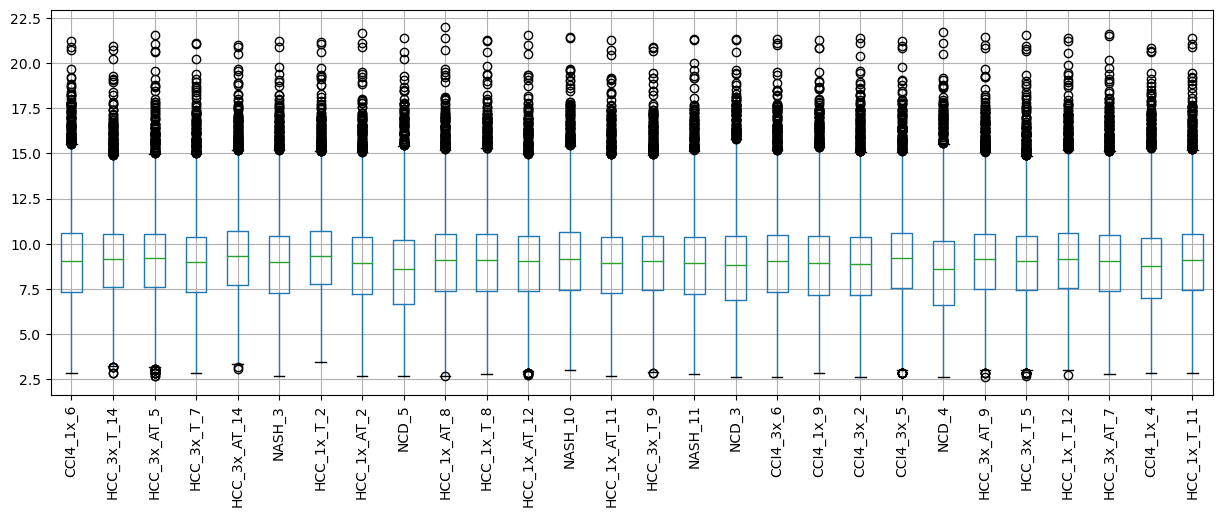

In [41]:
np.log2(cnt_filt2 + 1).boxplot(figsize=(15, 5))
plt.xticks(rotation=90);

In [42]:
cnt_filt2.describe()

,CCI4_1x_6,HCC_3x_T_14,HCC_3x_AT_5,HCC_3x_T_7,HCC_3x_AT_14,NASH_3,HCC_1x_T_2,HCC_1x_AT_2,NCD_5,HCC_1x_AT_8,...,CCI4_1x_9,CCI4_3x_2,CCI4_3x_5,NCD_4,HCC_3x_AT_9,HCC_3x_T_5,HCC_1x_T_12,HCC_3x_AT_7,CCI4_1x_4,HCC_1x_T_11
count,1.419100e+04,1.419100e+04,1.419100e+04,1.419100e+04,1.419100e+04,1.419100e+04,1.419100e+04,1.419100e+04,1.419100e+04,1.419100e+04,...,1.419100e+04,1.419100e+04,1.419100e+04,1.419100e+04,1.419100e+04,1.419100e+04,1.419100e+04,1.419100e+04,1.419100e+04,1.419100e+04
mean,3.104856e+03,2.420440e+03,2.693917e+03,2.483784e+03,2.888054e+03,2.450311e+03,2.925769e+03,2.657017e+03,2.433511e+03,2.912943e+03,...,2.741438e+03,2.692963e+03,2.715894e+03,2.640106e+03,2.814355e+03,2.597534e+03,2.944650e+03,2.832595e+03,2.556035e+03,2.818569e+03
std,3.476910e+04,2.805143e+04,3.974773e+04,3.193381e+04,3.206338e+04,3.032796e+04,3.492370e+04,4.102787e+04,3.169476e+04,4.760952e+04,...,3.459638e+04,3.621934e+04,3.459411e+04,3.956766e+04,3.752879e+04,3.972900e+04,3.805498e+04,4.172561e+04,2.922204e+04,3.730325e+04
min,5.990000e+00,6.000000e+00,5.170000e+00,6.000000e+00,7.180000e+00,5.160000e+00,9.730000e+00,5.180000e+00,5.250000e+00,5.230000e+00,...,6.000000e+00,5.050000e+00,6.000000e+00,5.010000e+00,5.120000e+00,5.340000e+00,5.390000e+00,5.680000e+00,6.000000e+00,6.000000e+00
25%,1.570000e+02,1.900000e+02,1.910000e+02,1.600000e+02,2.100000e+02,1.490000e+02,2.110000e+02,1.480000e+02,1.000000e+02,1.640000e+02,...,1.380000e+02,1.428100e+02,1.830000e+02,9.400000e+01,1.770550e+02,1.700000e+02,1.820000e+02,1.610000e+02,1.270000e+02,1.700000e+02
50%,5.280000e+02,5.550000e+02,5.829400e+02,5.057800e+02,6.280000e+02,4.980000e+02,6.300000e+02,4.843700e+02,3.830000e+02,5.410000e+02,...,4.830000e+02,4.710000e+02,5.748200e+02,3.790000e+02,5.650000e+02,5.200000e+02,5.690000e+02,5.280000e+02,4.320000e+02,5.520000e+02
75%,1.543000e+03,1.455470e+03,1.485595e+03,1.334140e+03,1.665295e+03,1.364000e+03,1.654525e+03,1.314000e+03,1.152000e+03,1.453000e+03,...,1.365500e+03,1.292500e+03,1.511000e+03,1.148240e+03,1.476965e+03,1.351500e+03,1.557950e+03,1.397000e+03,1.271000e+03,1.488000e+03
max,2.479710e+06,2.040568e+06,3.089510e+06,2.286011e+06,2.173412e+06,2.455585e+06,2.432496e+06,3.430145e+06,2.774562e+06,4.260763e+06,...,2.574762e+06,2.832191e+06,2.506701e+06,3.485479e+06,2.902298e+06,3.120287e+06,2.837155e+06,3.280136e+06,1.921278e+06,2.795254e+06


In [43]:
def MADFilter(cnt_df: pd.DataFrame) -> pd.DataFrame:
    crit_p = cnt_df.median(axis=0) + 3*mad(cnt_df, axis=0)
    crit_n = cnt_df.median(axis=0) - 3*mad(cnt_df, axis=0)
    
    return cnt_df[((cnt_df >= crit_n) & (cnt_df <= crit_p)).sum(axis=1) == 28]

In [44]:
cf2_mad = MADFilter(cnt_filt2)

In [181]:
cf2_mad.shape

(11126, 28)

In [45]:
cf2_mad.describe()

,CCI4_1x_6,HCC_3x_T_14,HCC_3x_AT_5,HCC_3x_T_7,HCC_3x_AT_14,NASH_3,HCC_1x_T_2,HCC_1x_AT_2,NCD_5,HCC_1x_AT_8,...,CCI4_1x_9,CCI4_3x_2,CCI4_3x_5,NCD_4,HCC_3x_AT_9,HCC_3x_T_5,HCC_1x_T_12,HCC_3x_AT_7,CCI4_1x_4,HCC_1x_T_11
count,11126.000000,11126.000000,11126.000000,11126.000000,11126.000000,11126.000000,11126.000000,11126.000000,11126.000000,11126.000000,...,11126.000000,11126.000000,11126.000000,11126.000000,11126.000000,11126.000000,11126.000000,11126.000000,11126.000000,11126.000000
mean,513.003214,526.562538,549.314655,471.492225,593.746176,473.156384,593.856105,455.991538,375.824922,507.089412,...,463.917884,453.385874,540.200599,374.839502,524.554471,488.300675,537.064947,490.077287,423.139763,518.341940
std,509.347172,488.099821,513.245664,438.238808,551.113975,458.567110,545.521953,433.972908,384.482735,484.169442,...,458.851459,440.346124,510.046273,394.105635,487.888285,458.899215,508.702029,461.001426,420.151604,490.570227
min,5.990000,6.000000,5.170000,6.000000,7.180000,5.160000,9.730000,5.180000,5.250000,5.230000,...,6.000000,5.050000,6.000000,5.010000,5.120000,5.340000,5.390000,5.680000,6.000000,6.000000
25%,111.000000,139.550000,139.000000,116.000000,152.000000,101.807500,154.000000,106.000000,70.000000,116.587500,...,98.252500,103.000000,131.000000,64.000000,128.000000,121.000000,129.000000,117.000000,93.000000,120.000000
50%,323.895000,364.785000,384.000000,324.000000,410.645000,312.400000,413.855000,309.000000,230.000000,343.000000,...,297.000000,301.000000,372.000000,220.000000,362.000000,335.990000,361.000000,333.000000,268.580000,352.000000
75%,766.750000,777.000000,813.232500,706.350000,878.750000,714.000000,882.382500,683.965000,574.892500,760.835000,...,696.000000,681.735000,808.000000,571.750000,796.782500,726.000000,801.022500,739.157500,634.790000,780.000000
max,2509.000000,2523.000000,2678.000000,2293.000000,2768.000000,2298.000000,2873.000000,2239.000000,1865.560000,2531.000000,...,2286.180000,2212.540000,2668.820000,1859.110000,2452.000000,2404.000000,2540.000000,2327.000000,2049.000000,2525.000000


<AxesSubplot: >

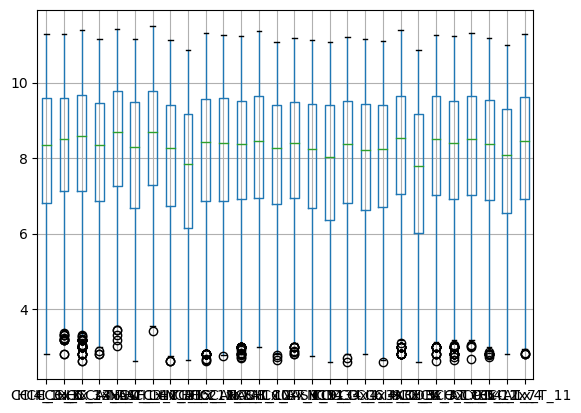

In [46]:
np.log2(cf2_mad+1).boxplot()

In [47]:
def CalculateTPM(cnt_df: pd.DataFrame, len_df: pd.DataFrame) -> pd.DataFrame:
    common_idx = set(cnt_df.index) & set(len_df.index)
    cnt = cnt_df.loc[list(common_idx), :]
    length = len_df.loc[list(common_idx)]

    rpk = cnt.div(length.values, axis=0) * 1e3
    
    tpm = rpk.div(rpk.sum().values) * 1e6
    
    return tpm

In [48]:
cf2_tpm2 = CalculateTPM(cf2_mad, length)

In [ ]:
cf2_tpm2.sum()

In [50]:
np.mean((np.log2(cf2_tpm2+1)).quantile(q=0.25)) - 2*np.std((np.log2(cf2_tpm2+1)).quantile(q=0.25)), \
np.mean((np.log2(cf2_tpm2+1)).quantile(q=0.25)) + 2*np.std((np.log2(cf2_tpm2+1)).quantile(q=0.25))

(4.00230051725216, 4.611835117333134)

In [51]:
(np.log2(cf2_tpm2+1)).quantile(q=0.25).sort_values(ascending=True)

NCD_4           3.867444
NCD_3           3.959057
NCD_5           4.001472
CCI4_1x_6       4.220604
NASH_10         4.226357
NASH_3          4.238768
HCC_1x_AT_8     4.249286
CCI4_1x_9       4.263922
HCC_1x_AT_2     4.266282
CCI4_1x_4       4.280437
HCC_1x_T_8      4.293349
NASH_11         4.293506
CCI4_3x_6       4.305554
HCC_3x_AT_7     4.328166
CCI4_3x_2       4.334281
HCC_3x_T_5      4.338458
HCC_1x_T_12     4.356307
HCC_1x_T_11     4.360171
HCC_3x_T_7      4.364844
HCC_3x_AT_9     4.371182
HCC_1x_AT_12    4.396959
HCC_1x_AT_11    4.418279
CCI4_3x_5       4.436706
HCC_3x_T_9      4.455240
HCC_3x_AT_5     4.459736
HCC_1x_T_2      4.479687
HCC_3x_AT_14    4.489563
HCC_3x_T_14     4.542285
Name: 0.25, dtype: float64

In [52]:
np.mean((np.log2(cf2_tpm2+1)).quantile(q=0.75)) - 2*np.std((np.log2(cf2_tpm2+1)).quantile(q=0.75)), \
np.mean((np.log2(cf2_tpm2+1)).quantile(q=0.75)) + 2*np.std((np.log2(cf2_tpm2+1)).quantile(q=0.75))

(6.8484986623643955, 6.917205180684428)

In [53]:
(np.log2(cf2_tpm2+1)).quantile(q=0.75).sort_values(ascending=True)

HCC_3x_T_5      6.848615
NASH_10         6.857372
HCC_1x_T_12     6.860124
HCC_1x_AT_8     6.861389
HCC_1x_T_2      6.864983
HCC_1x_AT_2     6.867894
HCC_1x_AT_12    6.868612
HCC_3x_AT_7     6.869741
HCC_1x_T_11     6.874848
NCD_3           6.874970
NCD_4           6.876643
HCC_3x_AT_9     6.877086
HCC_3x_AT_5     6.878710
NASH_11         6.880471
HCC_1x_T_8      6.882033
CCI4_1x_6       6.884360
HCC_3x_T_14     6.885654
HCC_3x_T_7      6.888828
HCC_3x_T_9      6.891286
HCC_3x_AT_14    6.893670
NASH_3          6.895414
HCC_1x_AT_11    6.895994
CCI4_3x_6       6.897662
CCI4_3x_5       6.900047
NCD_5           6.906028
CCI4_1x_4       6.906301
CCI4_3x_2       6.912631
CCI4_1x_9       6.918488
Name: 0.75, dtype: float64

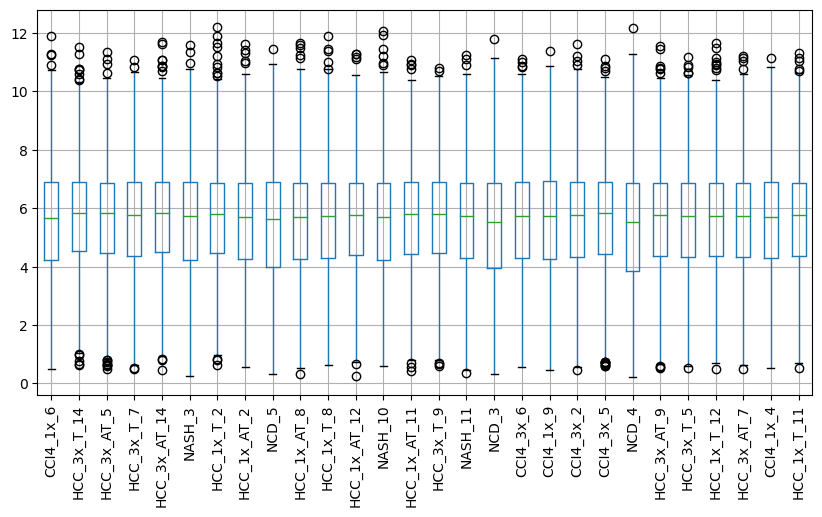

In [55]:
np.log2(cf2_tpm2+1).boxplot(figsize=(10, 5))
plt.xticks(rotation=90);

/Users/jigsaw-0/mambaforge/envs/ML/lib/python3.8/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


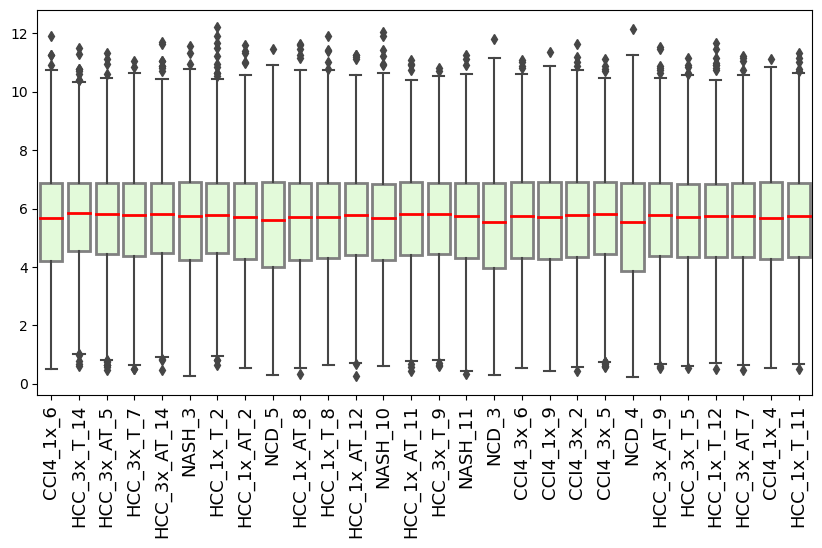

In [56]:
plt.figure(figsize=(10, 5))
#plt.ylim([3.7, 7.2])
plt.xticks(rotation=90, fontsize=13)
boxpl = sns.boxplot(data = np.log2(cf2_tpm2+1), 
                    boxprops={'edgecolor':'grey', 'facecolor': '#E3FADA', 'linewidth':2},
                    medianprops={'color':'red', 'linewidth':2});

/Users/jigsaw-0/mambaforge/envs/ML/lib/python3.8/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


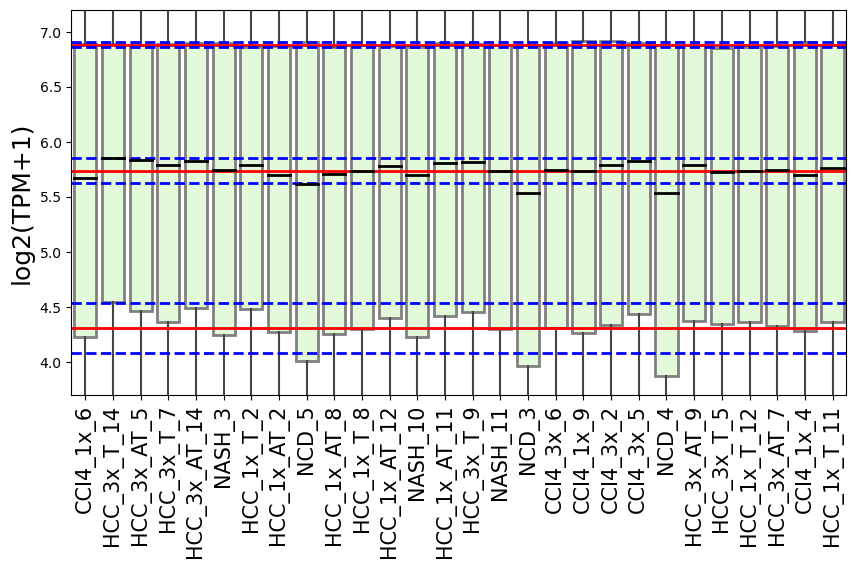

In [58]:
mean_median = np.mean(np.log2(cf2_tpm2+1).median())
std_median = np.std(np.log2(cf2_tpm2+1).median())

mean_q75 = np.mean(np.log2(cf2_tpm2+1).quantile(q=0.75))
std_q75 = np.std(np.log2(cf2_tpm2+1).quantile(q=0.75))

mean_q25 = np.mean(np.log2(cf2_tpm2+1).quantile(q=0.25))
std_q25 = np.std(np.log2(cf2_tpm2+1).quantile(q=0.25))

plt.figure(figsize=(10, 5))

sns.boxplot(data = np.log2(cf2_tpm2+1), 
            boxprops={'edgecolor':'grey', 'facecolor': '#E3FADA', 'linewidth':2},
            medianprops={'color':'black', 'linewidth':2})

plt.ylim([3.7, 7.2])
plt.ylabel("log2(TPM+1)", fontsize=18)
plt.xticks(rotation=90, fontsize=15)

plt.axhline(mean_median, color='red', linewidth=2)
plt.axhline(mean_median + 1.5*std_median, color='blue', linewidth=2, linestyle='--')
plt.axhline(mean_median - 1.5*std_median, color='blue', linewidth=2, linestyle='--')

plt.axhline(mean_q75, color='red', linewidth=2)
plt.axhline(mean_q75 + 1.5*std_q75, color='blue', linewidth=2, linestyle='--')
plt.axhline(mean_q75 - 1.5*std_q75, color='blue', linewidth=2, linestyle='--')

plt.axhline(mean_q25, color='red', linewidth=2)
plt.axhline(mean_q25 + 1.5*std_q25, color='blue', linewidth=2, linestyle='--')
plt.axhline(mean_q25 - 1.5*std_q25, color='blue', linewidth=2, linestyle='--')

plt.show()

In [59]:
cnt['length'] = length
filtered_cnt = cnt[(cnt.iloc[:, :-1] > 5).sum(axis=1) > 14]

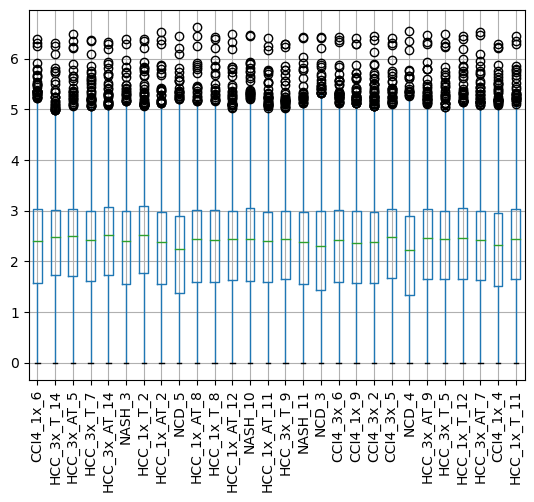

In [60]:
np.log10(filtered_cnt.iloc[:, :-1]+1).boxplot()
plt.xticks(rotation=90);

In [61]:
print(cnt.shape)
print(filtered_cnt.shape)

(55414, 29)
(18723, 29)


In [62]:
filtered_cnt.head()

,CCI4_1x_6,HCC_3x_T_14,HCC_3x_AT_5,HCC_3x_T_7,HCC_3x_AT_14,NASH_3,HCC_1x_T_2,HCC_1x_AT_2,NCD_5,HCC_1x_AT_8,...,CCI4_3x_2,CCI4_3x_5,NCD_4,HCC_3x_AT_9,HCC_3x_T_5,HCC_1x_T_12,HCC_3x_AT_7,CCI4_1x_4,HCC_1x_T_11,length
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000000001.5,6183.0,5080.0,4472.0,4622.0,5769.0,4420.0,5278.0,3841.0,3875.0,4724.0,...,3293.0,3704.0,3527.0,4715.0,5048.0,5853.0,4204.0,3951.0,4690.0,3262.00
ENSMUSG00000000028.16,99.0,75.0,56.0,80.0,97.0,49.0,81.0,51.0,55.0,100.0,...,57.0,137.0,82.0,106.0,79.0,81.0,100.0,104.0,74.0,1860.91
ENSMUSG00000000031.17,4982.0,14815.0,7907.0,1664.0,5435.0,42.0,5069.0,5509.0,0.0,552.0,...,58.0,135.0,11.0,4102.0,7528.0,1969.0,1058.0,106.0,25100.0,2072.07
ENSMUSG00000000049.12,65819.0,37488.0,36706.0,44460.0,46210.0,41466.0,49518.0,50986.0,57500.0,51631.0,...,49562.0,39776.0,65986.0,55478.0,40121.0,51357.0,53702.0,55236.0,56261.0,1190.00
ENSMUSG00000000056.8,3269.0,1749.0,1355.0,1527.0,2120.0,2190.0,2623.0,2689.0,1751.0,2171.0,...,2354.0,3158.0,1608.0,2052.0,1881.0,2818.0,1901.0,2623.0,2335.0,3821.24


In [63]:
cnt_numpy = filtered_cnt.iloc[:, :-1].to_numpy()
len_numpy = filtered_cnt['length'].to_numpy()
len_numpy = len_numpy[:, np.newaxis]

In [64]:
rpk = cnt_numpy / len_numpy

In [65]:
rpk.shape

(18723, 28)

In [66]:
tpm = rpk / rpk.sum(axis=1)[:, np.newaxis] * 1e6

In [67]:
tpm_df = pd.DataFrame(tpm, index=filtered_cnt.index, columns=filtered_cnt.columns[:-1])

In [68]:
tpm_df.head()

,CCI4_1x_6,HCC_3x_T_14,HCC_3x_AT_5,HCC_3x_T_7,HCC_3x_AT_14,NASH_3,HCC_1x_T_2,HCC_1x_AT_2,NCD_5,HCC_1x_AT_8,...,CCI4_1x_9,CCI4_3x_2,CCI4_3x_5,NCD_4,HCC_3x_AT_9,HCC_3x_T_5,HCC_1x_T_12,HCC_3x_AT_7,CCI4_1x_4,HCC_1x_T_11
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000000001.5,48401.111589,39766.722768,35007.240988,36181.455243,45160.280246,34600.180046,41316.685585,30067.713022,30333.868253,36979.920936,...,27241.770715,25777.916944,28995.264003,27609.691182,36909.468081,39516.223727,45817.840229,32909.311519,30928.803476,36713.765705
ENSMUSG00000000028.16,44938.719927,34044.484793,25419.881979,36314.117113,44030.867000,22242.396732,36768.043577,23150.249660,24965.955515,45392.646391,...,12709.940990,25873.808443,62187.925556,37221.970041,48116.205175,35860.190649,36768.043577,45392.646391,47208.352247,33590.558330
ENSMUSG00000000031.17,46986.701877,139724.606244,74573.233990,15693.671602,51259.077620,396.114307,47807.224370,51956.993304,0.000000,5206.073753,...,2508.723946,547.014996,1273.224559,103.744223,38687.164010,70998.773932,18570.215977,9978.308026,999.717061,236725.455060
ENSMUSG00000000049.12,46748.274968,26626.040080,26070.620656,31577.938059,32820.884339,29451.434538,35170.407935,36213.062300,40839.663481,36671.176786,...,41206.865325,35201.659156,28251.103559,46866.887556,39403.527837,28496.141540,36476.566911,38142.114926,39231.646123,39959.657515
ENSMUSG00000000056.8,53443.850442,28593.849625,22152.467834,24964.441611,34659.211666,35803.619599,42882.600095,43961.613288,28626.546994,35492.994589,...,42735.461932,38484.803898,51629.146435,26288.685075,33547.501104,30751.876012,46070.593621,31078.849707,42882.600095,38174.178887


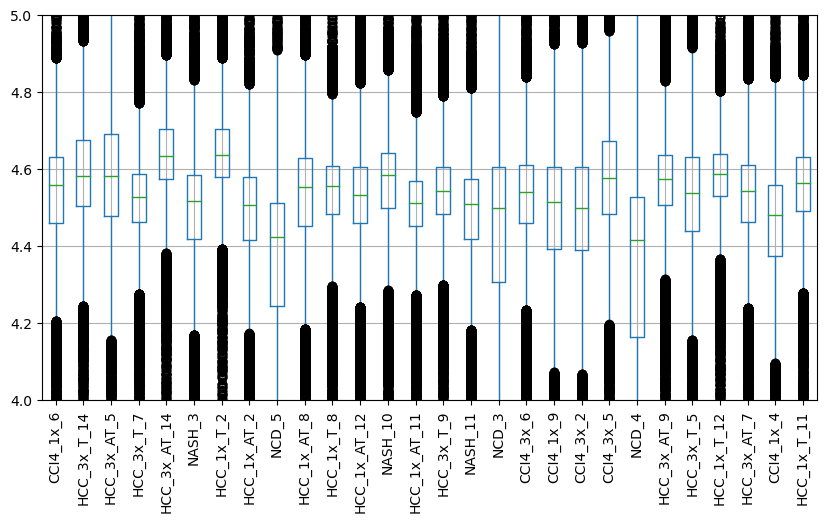

In [69]:
np.log10(tpm_df+1).boxplot(figsize=(10, 5))
plt.ylim([4, 5])
plt.xticks(rotation=90);

In [70]:
def MakeBoxplot(data: pd.DataFrame) -> None:
    plt.figure(figsize=(20, 10))
    plt.ylim([0, 0.0002])
    plt.ylabel("log2(TPM+1)", fontsize=18)
    plt.xticks(rotation=90, fontsize=15)

    mean_median = np.mean(np.log2(data+1).median())
    std_median = np.std(np.log2(data+1).median())

    mean_q75 = np.mean(np.log2(data+1).quantile(q=0.75))
    std_q75 = np.std(np.log2(data+1).quantile(q=0.75))

    mean_q25 = np.mean(np.log2(data+1).quantile(q=0.25))
    std_q25 = np.std(np.log2(data+1).quantile(q=0.25))
    
    sns.boxplot(data = np.log2(data+1), 
                boxprops={'edgecolor':'grey', 'facecolor': '#E3FADA', 'linewidth':2},
                medianprops={'color':'black', 'linewidth':2})

    plt.axhline(mean_median, color='red', linewidth=2)
    plt.axhline(mean_median + 1.5*std_median, color='blue', linewidth=2, linestyle='--')
    plt.axhline(mean_median - 1.5*std_median, color='blue', linewidth=2, linestyle='--')

    plt.axhline(mean_q75, color='red', linewidth=2)
    plt.axhline(mean_q75 + 1.5*std_q75, color='blue', linewidth=2, linestyle='--')
    plt.axhline(mean_q75 - 1.5*std_q75, color='blue', linewidth=2, linestyle='--')

    plt.axhline(mean_q25, color='red', linewidth=2)
    plt.axhline(mean_q25 + 1.5*std_q25, color='blue', linewidth=2, linestyle='--')
    plt.axhline(mean_q25 - 1.5*std_q25, color='blue', linewidth=2, linestyle='--')

    plt.show()

### Multi-Dimensional Scaling (MDS)

In [73]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(np.log2(cf2_tpm2+1).transpose())
pc_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
pc_df['sample'] = ['_'.join(x.split('_')[:-1]) for x in cf2_tpm2.columns]
pc_df['group'] = [x.split('_')[0] for x in cf2_tpm2.columns]

In [221]:
pc_df.head()

,PC1,PC2,sample,group
0,17.638536,12.044542,CCI4_1x,CCI4
1,-31.547861,1.339956,HCC_3x_T,HCC
2,-38.033497,-10.278634,HCC_3x_AT,HCC
3,-13.352074,-14.350922,HCC_3x_T,HCC
4,-21.086140,0.821632,HCC_3x_AT,HCC


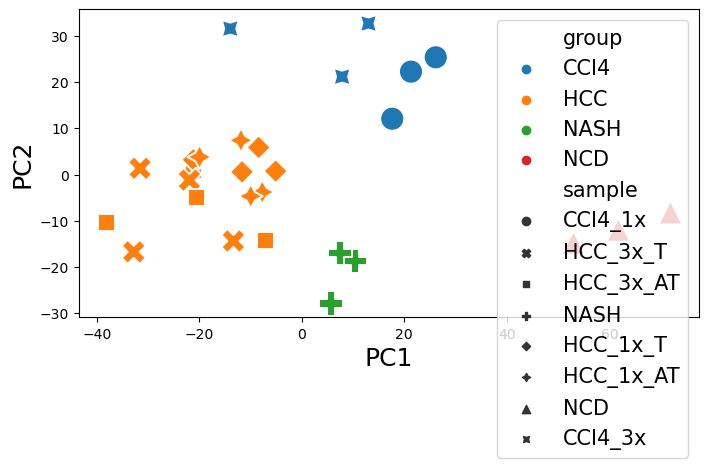

In [222]:
plt.figure(figsize=(8, 4))
plt.xlabel("PC1", size=18)
plt.ylabel("PC2", size=18)

pcapl = sns.scatterplot(data=pc_df, x='PC1', y='PC2', hue='group', style='sample', s=300);
pcapl.legend(fontsize=15)

plt.show()

#### What if we plot PCA with original data?

In [77]:
def MakePCA(data: pd.DataFrame) -> None:
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(np.log2(data+1).transpose())
    pc_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
    pc_df['sample'] = ['_'.join(x.split('_')[:-1]) for x in data.columns]
    pc_df['group'] = [x.split('_')[0] for x in data.columns]

    plt.figure(figsize=(10, 5))
    plt.xlabel("PC1", size=18)
    plt.ylabel("PC2", size=18)

    sns.scatterplot(data=pc_df, x='PC1', y='PC2', hue='group', style='sample', s=300);
    plt.legend(bbox_to_anchor=(1.005, 1), loc='upper left', borderaxespad=0, fontsize=15);

    plt.show()

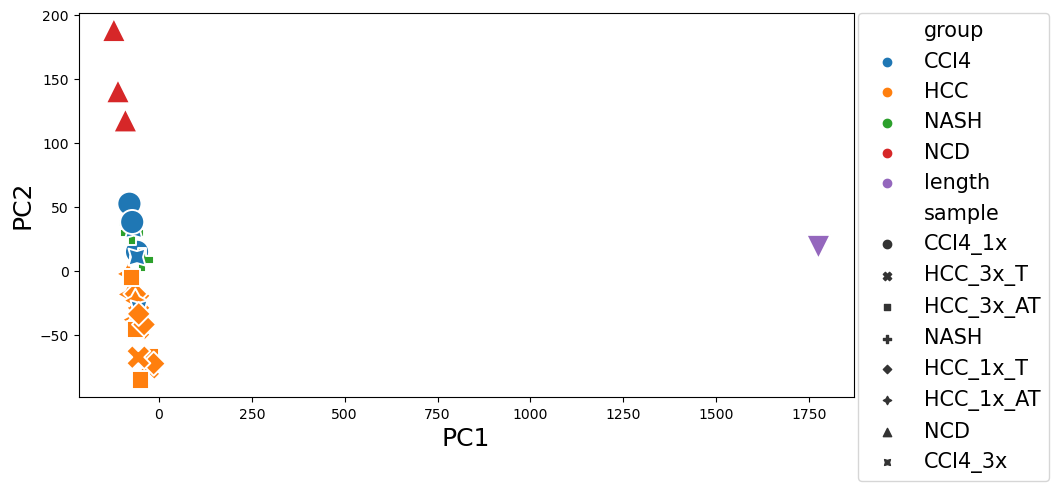

In [92]:
MakePCA(cnt)

In [79]:
cf2_tpm2.head()

,CCI4_1x_6,HCC_3x_T_14,HCC_3x_AT_5,HCC_3x_T_7,HCC_3x_AT_14,NASH_3,HCC_1x_T_2,HCC_1x_AT_2,NCD_5,HCC_1x_AT_8,...,CCI4_1x_9,CCI4_3x_2,CCI4_3x_5,NCD_4,HCC_3x_AT_9,HCC_3x_T_5,HCC_1x_T_12,HCC_3x_AT_7,CCI4_1x_4,HCC_1x_T_11
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000025531.15,100.155971,96.649968,59.000143,88.476455,95.713345,76.293133,85.214091,69.383447,80.730489,64.195103,...,71.896288,56.647121,73.031825,67.746211,68.798077,74.088778,92.965947,72.319242,103.116439,76.350046
ENSMUSG00000030302.18,14.031744,22.957102,10.840351,16.447866,21.326910,7.760309,19.078892,22.571695,9.669665,27.910234,...,12.511222,13.792006,29.398617,8.412217,23.780806,14.925004,20.949746,18.353825,15.710409,46.862933
ENSMUSG00000030046.7,12.837001,4.940560,3.565987,9.243647,6.348666,10.512363,10.962699,15.096478,15.585422,10.547393,...,17.963552,11.503843,15.951639,13.510154,10.144738,3.373890,7.334667,11.732754,20.223454,6.037660
ENSMUSG00000079260.4,19.631874,17.505592,16.986750,16.879822,17.322963,19.747892,21.051663,19.010134,13.988345,14.556080,...,17.088515,28.961253,30.293320,10.738632,19.076184,14.076714,14.383460,19.583970,20.894486,21.429032
ENSMUSG00000039781.15,5.369679,8.758538,10.627947,11.174090,11.257552,9.681130,9.368258,18.516312,6.825613,12.462933,...,12.215040,9.434596,15.132899,6.988577,10.529018,8.568535,10.226898,12.101365,7.250923,12.530540


In [ ]:
def FindHighVariableMAD(data: pd.DataFrame) -> pd.DataFrame:
    

In [80]:
def FindHighVariableCV(data: pd.DataFrame) -> pd.DataFrame:
    df_mean = data.mean(axis=1)
    df_std = data.std(axis=1)
    cv = df_mean.div(df_std).sort_values(ascending=False)
    
    return data.loc[cv.index[:round(len(cv)*0.25+1)], :]

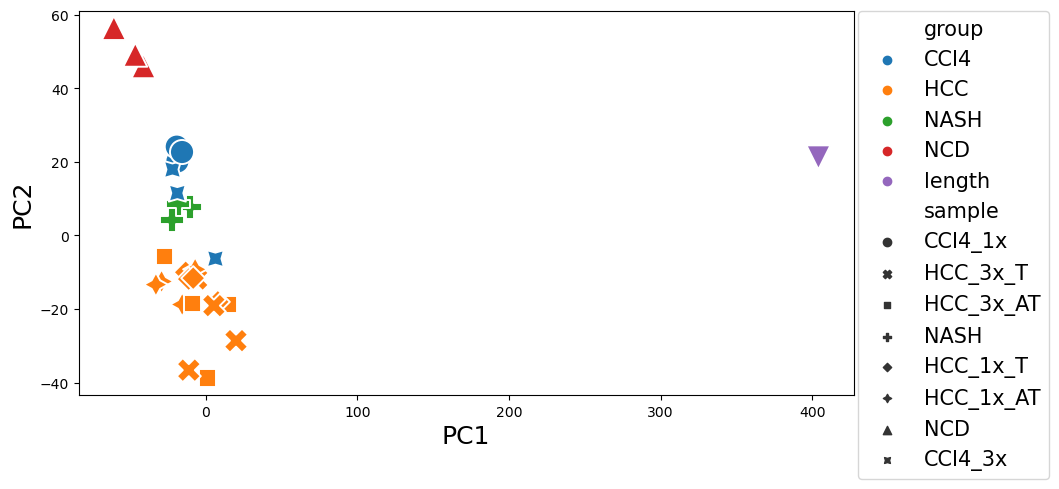

In [82]:
cnt_hv = FindHighVariableCV(cnt)
cnt_hv_tpm = CalculateTPM(cnt_hv, length)
MakePCA(cnt_hv_tpm)

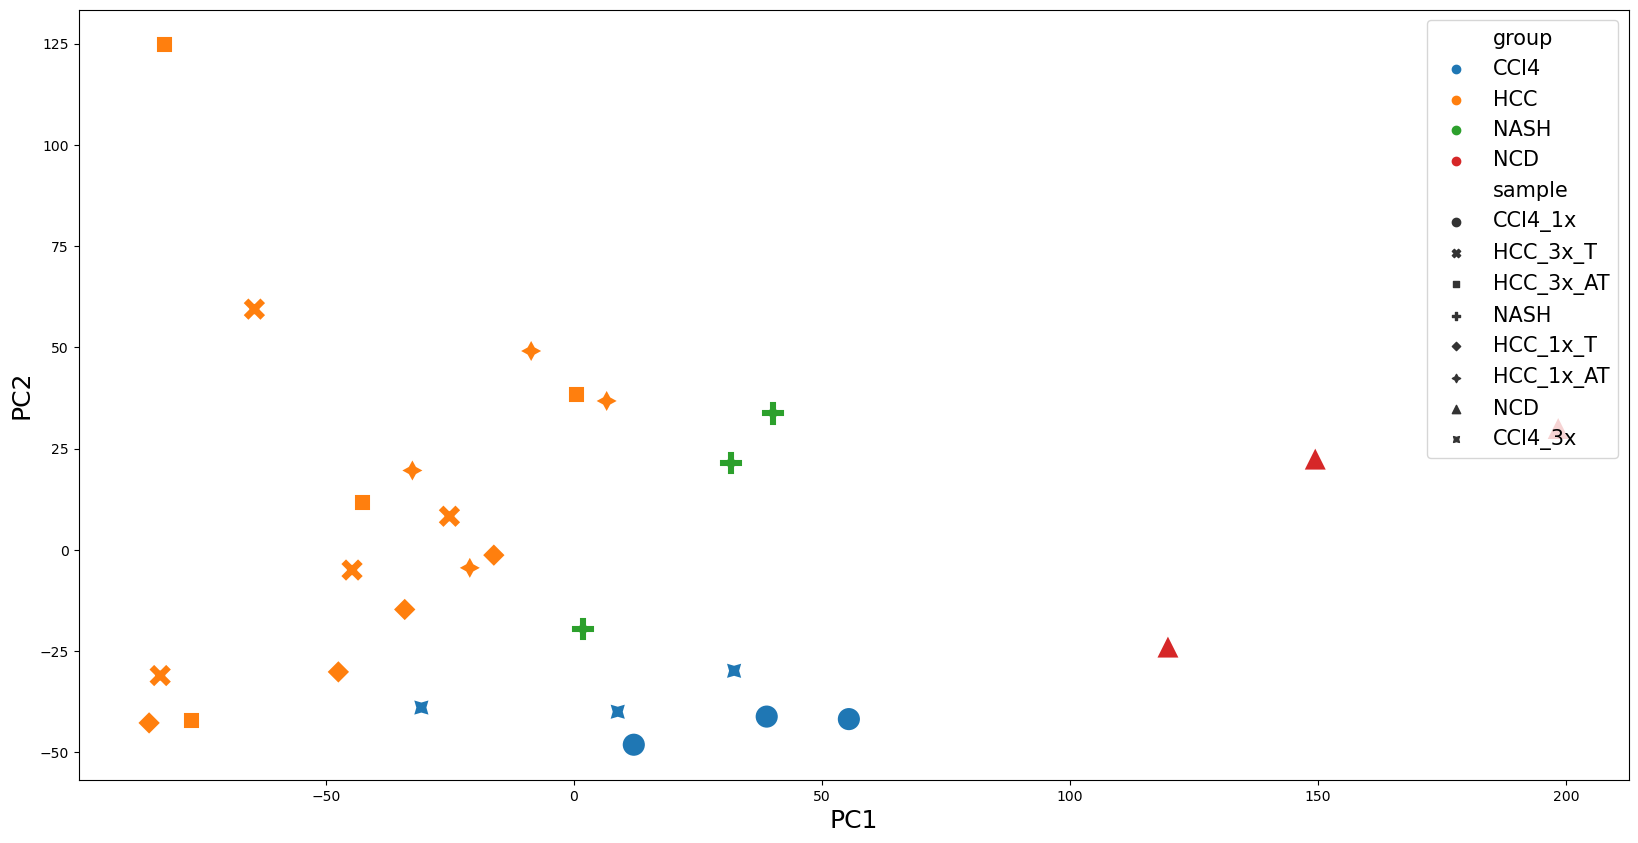

In [496]:
MakePCA(cnt)

In [83]:
test = FindHighVariableCV(cf2_mad)
test.shape

(2782, 28)

In [84]:
cf2_hv = FindHighVariableCV(cf2_mad)
cf2_hv_tpm = CalculateTPM(cf2_hv, length)

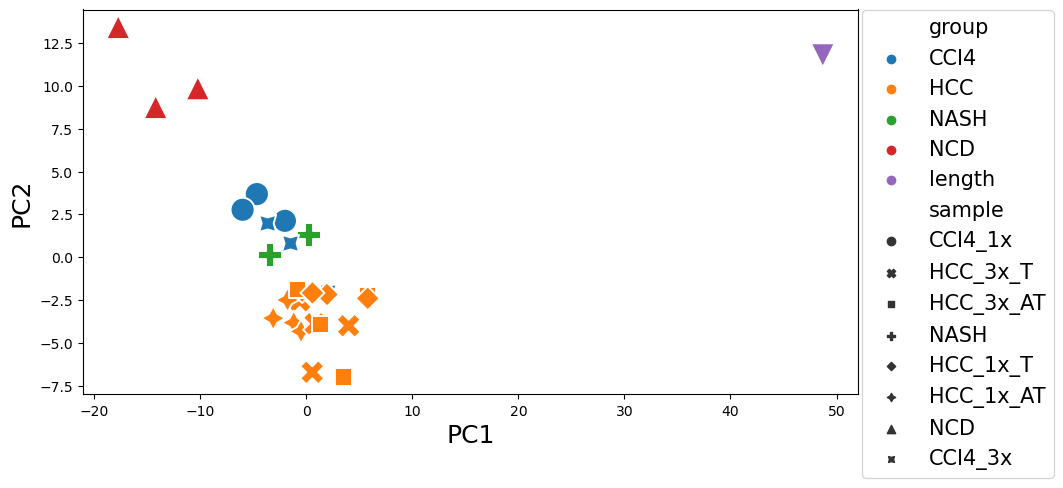

In [85]:
MakePCA(FindHighVariableCV(np.log2(cnt+1)))

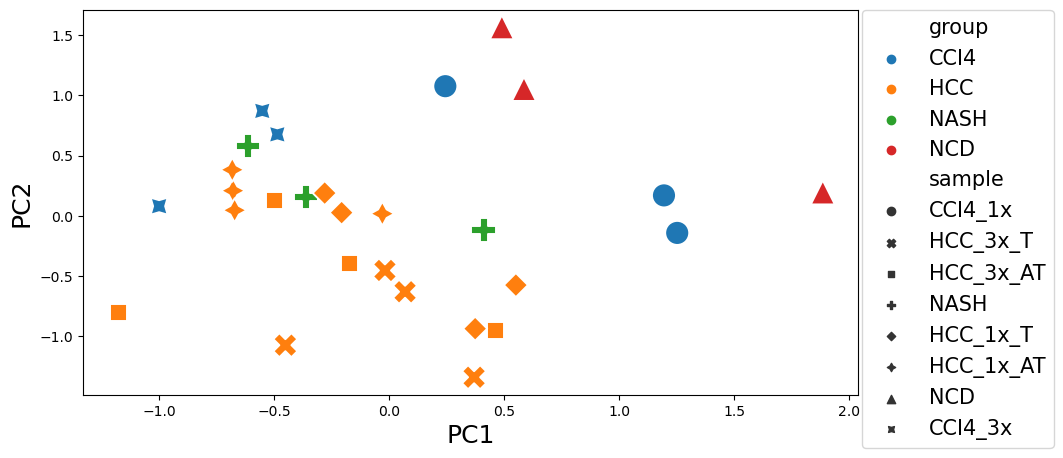

In [86]:
MakePCA(FindHighVariableCV(np.log2(cf2_tpm2+1)))

In [ ]:
FindHighVariableCV(np.log2(tpm+1))

In [88]:
def CalculateTPM(cnt_df: pd.DataFrame, len_df: pd.DataFrame) -> pd.DataFrame:
    common_idx = set(cnt_df.index) & set(len_df.index)
    cnt = cnt_df.loc[list(common_idx), :]
    length = len_df.loc[list(common_idx)]

    rpk = cnt.div(length.values, axis=0) * 1e3
    
    tpm = rpk.div(rpk.sum().values)
    
    return tpm

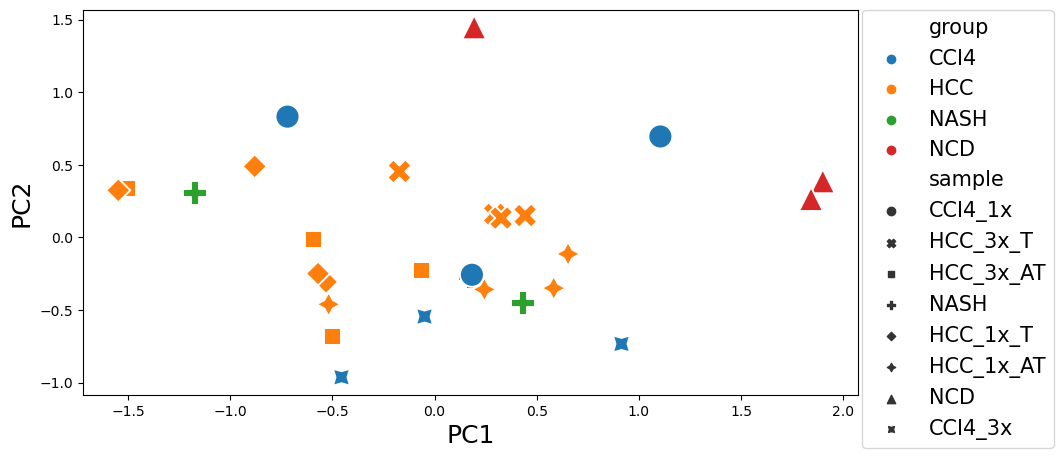

In [89]:
MakePCA(FindHighVariable(np.log2(cf2_mad+1)))

### Let's Wrap Up

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.robust import mad
from sklearn.decomposition import PCA
import gseapy as gp  # I had to install with pip (conda version envokes 'No module named gseapy.gse' error)

#### Gather Count Data of all samples into single file

In [2]:
def CountExtractor(file_path: str) -> list:
    """Extract count values from rsem results

    Args:
        file_path (str): a path where all the rsem results are in

    Returns:
        list: a list containing dataframes of expected_count, tpm, fpkm
    """
    
    cnt_df = pd.DataFrame()
    tpm_df = pd.DataFrame()
    fpkm_df = pd.DataFrame()
    
    rsem_results = os.listdir(file_path)
    
    first = True
    for rsem in rsem_results:
        temp = pd.read_csv(os.path.join(file_path, rsem), sep='\t')
        temp['gene_id'] = pd.Series(map(lambda x: x.split('.')[0], temp['gene_id']))  ## remove id version
        temp.index = temp['gene_id']
        
        if first:
            first = False
        else:
            if all(temp.index != cnt_df.index):
                print("Error, Index not matching!!\n")
                break
        
        name = rsem[:-14]
        
        cnt_df[name] = temp['expected_count']
        tpm_df[name] = temp['TPM']
        fpkm_df[name] = temp['FPKM']
    
    return [cnt_df, tpm_df, fpkm_df, temp['length']]

In [3]:
cnt, tpm, fpkm, gene_length = CountExtractor("../../data/rsem_result/")

#### Remove Outliers
* remove low counts : within same gene (row-wise)
* retain (median - 3*MAD, median + 3*MAD) : within same sample (column-wise)
<br/><br/>
* Reference
  * https://www.biostars.org/p/9495904/ (removing low counts)
  * https://nbisweden.github.io/workshop-RNAseq/2011/lab_preprocessing.html (removing low counts)

In [4]:
def MADFilter(cnt_df: pd.DataFrame) -> pd.DataFrame:
    crit_ub = cnt_df.median(axis=0) + 3*mad(cnt_df, axis=0)
    crit_lb = cnt_df.median(axis=0) - 3*mad(cnt_df, axis=0)
    
    return cnt_df[((cnt_df >= crit_lb) & (cnt_df <= crit_ub)).sum(axis=1) == 28]


def DataCleansing(data: pd.DataFrame, 
                  hard_min_cnt: int=7,
                  soft_min_cnt: int=7,
                  sample_threshold: int=3) -> pd.DataFrame:

    data_cleaned = data[(data >= hard_min_cnt).sum(axis=1) == 28]  # let minimum cnt as 5
    data_cleaned = data_cleaned[(data_cleaned >= soft_min_cnt).sum(axis=1) >= sample_threshold]
    data_cleaned = MADFilter(data_cleaned)
    
    return data_cleaned

In [5]:
cleaned_cnt = DataCleansing(cnt)

#### Transform count data into TPM
* TPM.sum(axis=0) should be all equals to 1e6

In [6]:
def CalculateTPM(cnt_df: pd.DataFrame, len_df: pd.DataFrame) -> pd.DataFrame:
    common_idx = set(cnt_df.index) & set(len_df.index)
    cnt = cnt_df.loc[list(common_idx), :]
    length = len_df.loc[list(common_idx)]

    rpk = cnt.div(length.values, axis=0) * 1e3
    
    tpm = rpk.div(rpk.sum().values) * 1e6
    
    return tpm

In [7]:
cleaned_TPM = CalculateTPM(cleaned_cnt, gene_length)

#### Find Highly Variable Genes
* robust alternative to the coefficient of variation (CV) : $d = \frac{MAD}{\tilde{x}}$
<br/><br/>
* Reference
  * https://jdblischak.github.io/singlecell-qtl/pca-variable.html
  * https://www.itl.nist.gov/div898/software/dataplot/refman2/auxillar/madmed.htm

In [8]:
def FindHighVarGene(cnt_df: pd.DataFrame) -> pd.DataFrame:
    robust_cv = mad(np.log(cnt_df+1), axis=1) / np.median(np.log(cnt_df+1), axis=1)  # Row wise (Gene wise)
    upper25 = [x for x, y in sorted(zip(cnt_df.index, robust_cv), key=lambda x: x[1], reverse=True)][:int(np.round(cnt_df.shape[0] * 0.25))]
    
    return cnt_df.loc[upper25, :]

In [9]:
highvar_TPM = FindHighVarGene(cleaned_TPM)

#### PCA
1. take logarithm on (data + pseudocount)
2. Z-transform each sample (column-wise)
3. run PCA

In [10]:
def GetPCA(data: pd.DataFrame) -> pd.DataFrame:
    log_data = np.log(data+1)
    z_scaled = (log_data - log_data.mean(axis=0)) / np.std(log_data, axis=0)
    
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(z_scaled.transpose())
    pc_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
    pc_df['sample'] = ['_'.join(x.split('_')[:-1]) for x in z_scaled.columns]
    pc_df['group'] = [x.split('_')[0] for x in z_scaled.columns]
    
    return pc_df


def PlotPCA(data: pd.DataFrame, figsize: tuple=(20, 10)) -> None:
    pc_df = GetPCA(data)

    plt.figure(figsize=figsize)
    plt.xlabel("PC1", size=18)
    plt.ylabel("PC2", size=18)

    sns.scatterplot(data=pc_df, x='PC1', y='PC2', hue='group', style='sample', s=300);
    plt.legend(bbox_to_anchor=(1.005, 1), loc='upper left', borderaxespad=0, fontsize=15);

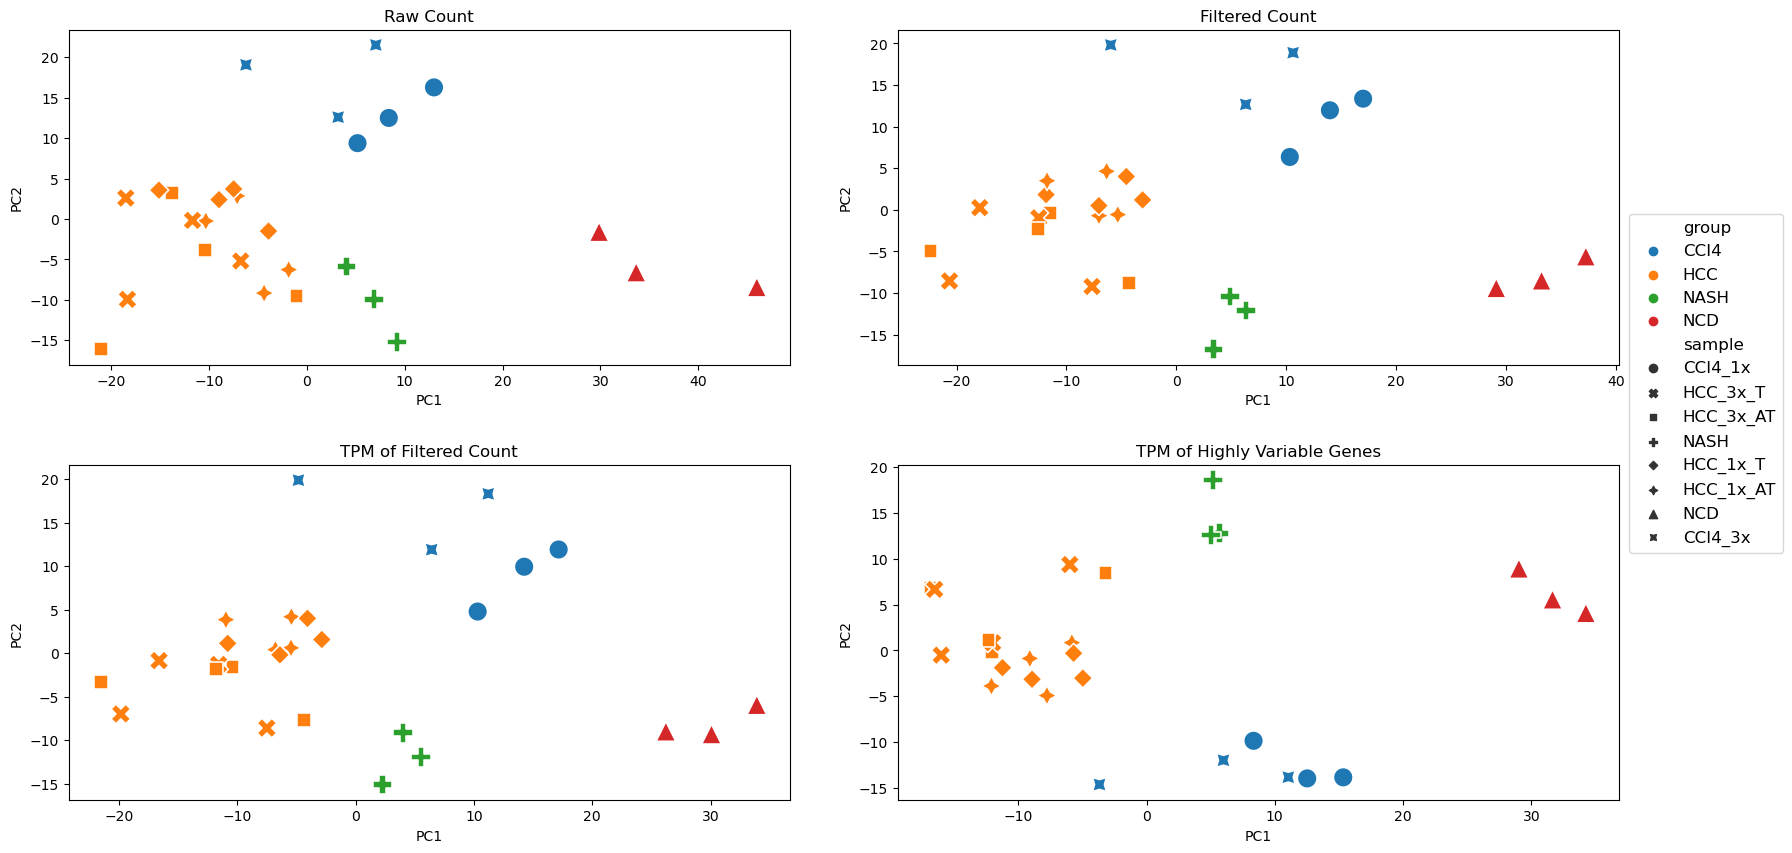

In [13]:
fig, axes = plt.subplots(2, 2)  # options : sharex=True, sharey=True
fig.set_size_inches((20, 10))
plt.subplots_adjust(wspace=0.15, hspace=0.3)

s1 = sns.scatterplot(data=GetPCA(cnt), x='PC1', y='PC2', hue='group', style='sample', s=200, ax=axes[0, 0], legend=False)
axes[0, 0].set_title("Raw Count")
#axes[0, 0].legend()

s2 = sns.scatterplot(data=GetPCA(cleaned_cnt), x='PC1', y='PC2', hue='group', style='sample', s=200, ax=axes[0, 1], legend=False)
axes[0, 1].set_title("Filtered Count")
#axes[0, 1].legend()

s3 = sns.scatterplot(data=GetPCA(cleaned_TPM), x='PC1', y='PC2', hue='group', style='sample', s=200, ax=axes[1, 0], legend=False)
axes[1, 0].set_title("TPM of Filtered Count")
#axes[1, 0].legend()

s4 = sns.scatterplot(data=GetPCA(highvar_TPM), x='PC1', y='PC2', hue='group', style='sample', s=200, ax=axes[1, 1], legend=True)
axes[1, 1].set_title("TPM of Highly Variable Genes")
axes[1, 1].legend(bbox_to_anchor=(1.015, 1.75), loc='upper left', borderaxespad=0, fontsize=12);

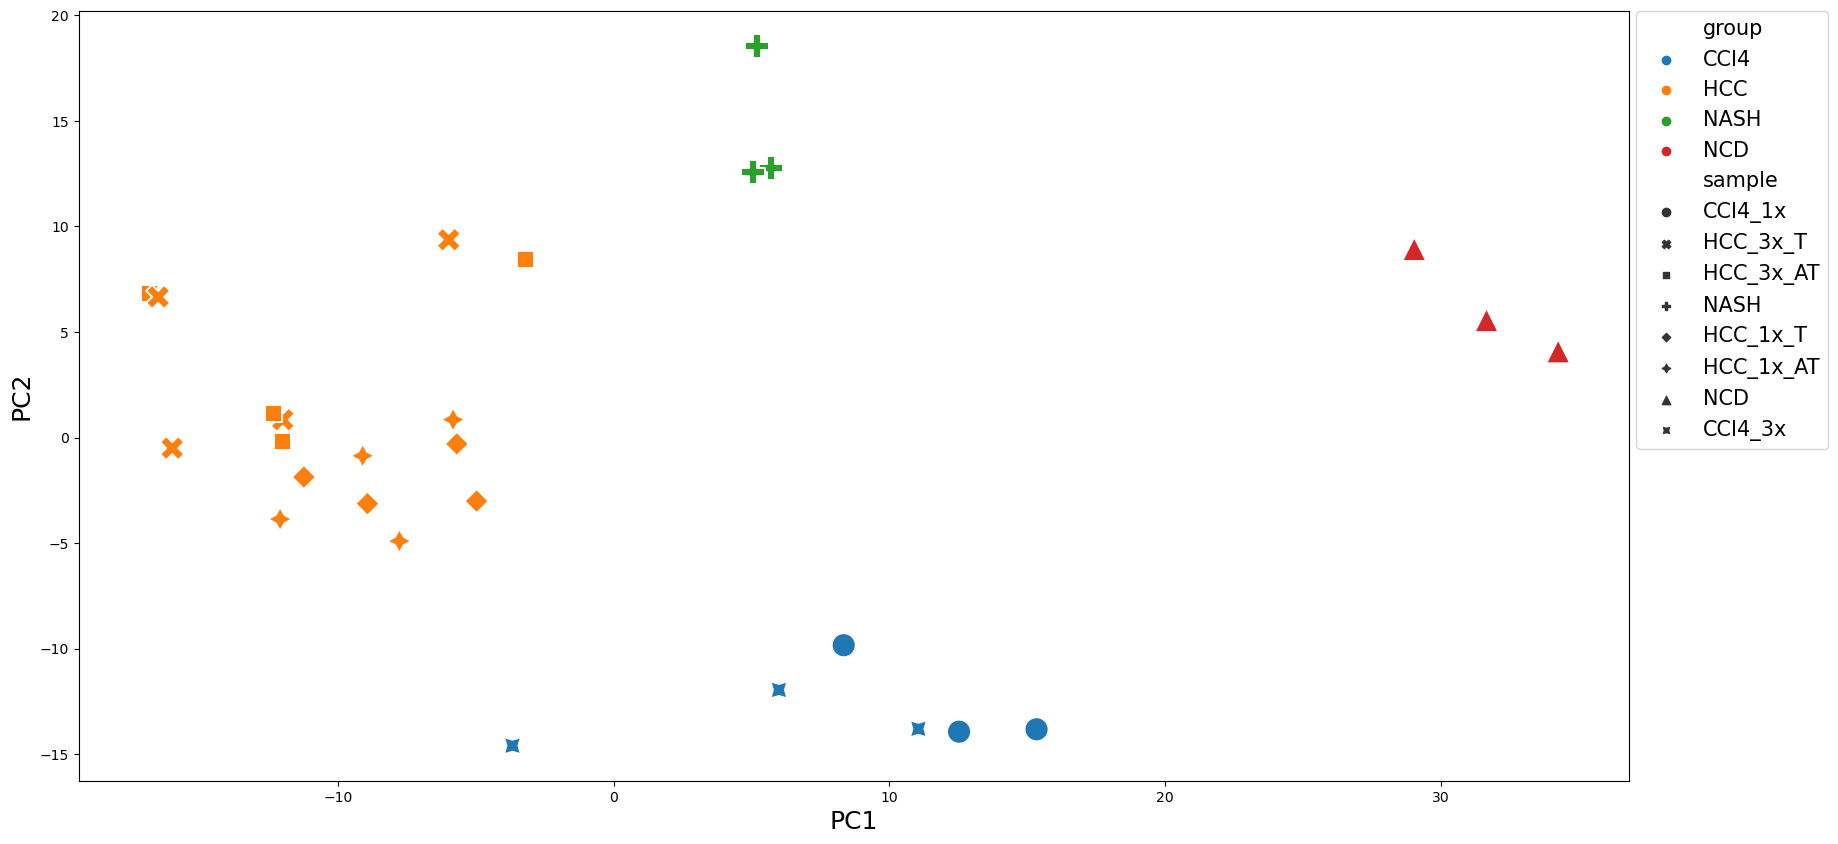

In [14]:
PlotPCA(highvar_TPM)

#### ssGSEA

* Reference
  * https://gseapy.readthedocs.io/en/latest/gseapy_example.html#5.-Single-Sample-GSEA-example

In [15]:
cleaned_TPM.head()

,CCI4_1x_6,HCC_3x_T_14,HCC_3x_AT_5,HCC_3x_T_7,HCC_3x_AT_14,NASH_3,HCC_1x_T_2,HCC_1x_AT_2,NCD_5,HCC_1x_AT_8,...,CCI4_1x_9,CCI4_3x_2,CCI4_3x_5,NCD_4,HCC_3x_AT_9,HCC_3x_T_5,HCC_1x_T_12,HCC_3x_AT_7,CCI4_1x_4,HCC_1x_T_11
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000097318,27.032613,23.318162,10.353374,22.539797,15.724552,27.356812,21.303153,21.583448,20.481451,8.281616,...,33.592698,6.308864,39.153089,28.002574,28.940653,22.864883,22.956006,24.904083,18.260290,24.961741
ENSMUSG00000002871,127.509419,159.549832,172.133252,148.323015,174.125770,186.556134,142.488700,171.584102,143.231006,141.146732,...,155.890083,185.914561,189.714241,113.076343,184.603067,160.530348,151.142101,153.263289,118.508961,154.885576
ENSMUSG00000031442,6.878214,12.636250,20.942894,8.711823,11.369440,3.002657,15.621600,8.306229,8.136396,10.498742,...,8.775301,14.928693,4.599814,3.827623,10.530089,25.882619,10.621005,9.388555,4.429351,23.562073
ENSMUSG00000010797,53.471157,34.137882,12.981843,29.108907,42.510142,43.393327,25.619033,41.977995,32.559917,58.433818,...,37.656548,17.776474,34.158831,39.561496,55.315385,22.835557,45.885395,29.930586,44.900431,37.470440
ENSMUSG00000021640,8.386310,7.387577,7.961787,10.017072,7.766555,33.848601,6.313449,10.290247,17.041354,11.153942,...,7.048271,16.056684,9.628882,10.130458,7.494926,3.500353,6.565637,11.316358,10.168355,13.845117


In [53]:
cleaned_TPM.columns

Index(['CCI4_1x_6', 'HCC_3x_T_14', 'HCC_3x_AT_5', 'HCC_3x_T_7', 'HCC_3x_AT_14',
       'NASH_3', 'HCC_1x_T_2', 'HCC_1x_AT_2', 'NCD_5', 'HCC_1x_AT_8',
       'HCC_1x_T_8', 'HCC_1x_AT_12', 'NASH_10', 'HCC_1x_AT_11', 'HCC_3x_T_9',
       'NASH_11', 'NCD_3', 'CCI4_3x_6', 'CCI4_1x_9', 'CCI4_3x_2', 'CCI4_3x_5',
       'NCD_4', 'HCC_3x_AT_9', 'HCC_3x_T_5', 'HCC_1x_T_12', 'HCC_3x_AT_7',
       'CCI4_1x_4', 'HCC_1x_T_11'],
      dtype='object')

In [54]:
test = gp.ssgsea(data=cleaned_TPM[['NCD_3', 'NCD_4', 'NCD_5']],
                 gene_sets="KEGG_2019_Mouse")

2022-12-03 23:34:58,683 No gene sets passed through filtering condition !!! 
Hint 1: Try to lower min_size or increase max_size !
Hint 2: Check gene symbols are identifiable to your gmt input.
Hint 3: Gene symbols curated in Enrichr web services are all upcases.



KeyError: 'ABC transporters'

In [55]:
# import gseapy as gp

def ConvertID(data: pd.DataFrame) -> pd.DataFrame:
    """Convert Ensembl ID to Official Gene Symbol
    ref : https://gseapy.readthedocs.io/en/latest/gseapy_example.html#

    Args:
        data (pd.DataFrame): DataFrame containig Ensembl ID as row index

    Returns:
        pd.DataFrame: DataFrame containing Official Gene Symbol as row index
    """
    
    bm = gp.Biomart()
    # bm.get_datasets(mart='ENSEMBL_MART_ENSEMBL')  # get list of dataset using 'ENSEMBL_MART_ENSEMBL'
    res = d

,Name,Description
0,ggallus_gene_ensembl,Chicken genes (bGalGal1.mat.broiler.GRCg7b)
1,pmbairdii_gene_ensembl,Northern American deer mouse genes (HU_Pman_2.1)
2,cintestinalis_gene_ensembl,C.intestinalis genes (KH)
3,eeuropaeus_gene_ensembl,Hedgehog genes (eriEur1)
4,umaritimus_gene_ensembl,Polar bear genes (UrsMar_1.0)
...,...,...
210,pmuralis_gene_ensembl,Common wall lizard genes (PodMur_1.0)
211,dleucas_gene_ensembl,Beluga whale genes (ASM228892v3)
212,omykiss_gene_ensembl,Rainbow trout genes (USDA_OmykA_1.1)
213,vursinus_gene_ensembl,Common wombat genes (bare-nosed_wombat_genome_...


In [22]:
[x for x in gp.get_library_name() if 'KEGG' in x]

['KEGG_2013',
 'KEGG_2015',
 'KEGG_2016',
 'KEGG_2019_Human',
 'KEGG_2019_Mouse',
 'KEGG_2021_Human']

In [19]:
test_df = pd.read_csv('https://raw.githubusercontent.com/kuanrongchan/vaccine-studies/main/Ad5_seroneg.csv',index_col=0)

In [20]:
test_df.head()

,pval_6h,qval_6h,ratio_6h,fc_6h,pval_1d,qval_1d,ratio_1d,fc_1d,pval_3d,qval_3d,ratio_3d,fc_3d,pval_7d,qval_7d,ratio_7d,fc_7d
gene,,,,,,,,,,,,,,,,
A1BG,0.161401,0.607199,0.881776,-1.13408,0.207777,0.453011,0.919950,-1.08702,0.146526,0.758220,0.877620,-1.13944,0.593743,0.994179,0.953576,-1.04868
A1CF,0.391671,0.752327,0.959703,-1.04199,0.412320,0.662397,1.029490,1.02949,0.691183,0.952774,1.019200,1.01920,0.776319,0.997914,0.986492,-1.01369
A2M,0.791075,0.939349,0.944951,-1.05826,0.005861,0.041660,1.570380,1.57038,0.826029,0.977290,0.954112,-1.04809,0.949556,0.998861,0.986573,-1.01361
A2ML1,0.030945,0.525981,0.820747,-1.21840,0.055373,0.200387,0.879047,-1.13760,0.362553,0.875680,0.921447,-1.08525,0.487490,0.991615,0.939620,-1.06426
A4GALT,0.359688,0.732293,0.909414,-1.09961,0.008561,0.054997,1.230450,1.23045,0.779175,0.968617,1.029380,1.02938,0.718931,0.997914,1.037880,1.03788


In [44]:
test_df[['pval_6h', 'pval_1d']].head()

,pval_6h,pval_1d
gene,,
A1BG,0.161401,0.207777
A1CF,0.391671,0.412320
A2M,0.791075,0.005861
A2ML1,0.030945,0.055373
A4GALT,0.359688,0.008561


In [46]:
test = test_df[['pval_6h', 'pval_1d']]

In [47]:
test_gsea2 = gp.ssgsea(data=test, gene_sets='KEGG_2021_Human')

2022-12-03 23:00:52,294 Warning: dropping duplicated gene names, values averaged by gene names!
/Users/jigsaw-0/System/mambaforge/envs/ML/lib/python3.8/site-packages/gseapy/base.py:498: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, dd in res_df.groupby(["name"]):


In [52]:
test_gsea2.res2d.head(20)

,Name,Term,ES,NES
0,pval_6h,Maturity onset diabetes of the young,-5063.015648,-0.573847
1,pval_1d,Steroid biosynthesis,-4265.373916,-0.483442
2,pval_1d,B cell receptor signaling pathway,-4254.323831,-0.482189
3,pval_1d,Primary immunodeficiency,-3940.605895,-0.446632
4,pval_1d,Nicotine addiction,3759.918493,0.426153
5,pval_1d,Fatty acid biosynthesis,-3582.505311,-0.406045
6,pval_6h,Nicotine addiction,-3481.534242,-0.394601
7,pval_6h,Proteasome,3480.186348,0.394448
8,pval_1d,PD-L1 expression and PD-1 checkpoint pathway i...,-3466.125493,-0.392854
9,pval_6h,Lysosome,3421.873927,0.387839


In [43]:
test_gsea2.res2d

,Name,Term,ES,NES
0,sample1,Maturity onset diabetes of the young,-5063.015648,-0.592637
1,sample1,Nicotine addiction,-3481.534242,-0.407521
2,sample1,Proteasome,3480.186348,0.407363
3,sample1,Lysosome,3421.873927,0.400538
4,sample1,Graft-versus-host disease,3343.231329,0.391332
...,...,...,...,...
299,sample1,Aminoacyl-tRNA biosynthesis,32.384686,0.003791
300,sample1,ABC transporters,28.271443,0.003309
301,sample1,cGMP-PKG signaling pathway,-20.118955,-0.002355
302,sample1,PPAR signaling pathway,-9.214423,-0.001079


In [27]:
test_gsea = gp.ssgsea(data=test_df, gene_sets='KEGG_2021_Human')

2022-12-03 21:18:48,936 Warning: dropping duplicated gene names, values averaged by gene names!
/Users/jigsaw-0/System/mambaforge/envs/ML/lib/python3.8/site-packages/gseapy/base.py:498: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, dd in res_df.groupby(["name"]):


In [28]:
type(test_gsea)

gseapy.gsea.SingleSampleGSEA

In [33]:
dir(test_gsea)

['ENRICHR_URL',
 '_LIBRARY_LIST_URL',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_download_libraries',
 '_heatmat',
 '_load_ranking',
 '_logger',
 '_metric_dict',
 '_noplot',
 '_outdir',
 '_plotting',
 '_set_cores',
 '_threads',
 '_tmpdir',
 '_to_df',
 'ascending',
 'corplot',
 'data',
 'enrichment_score',
 'fdr',
 'figsize',
 'format',
 'gene_sets',
 'get_libraries',
 'gmt',
 'graph_num',
 'load_data',
 'load_gmt',
 'load_gmt_only',
 'max_size',
 'min_size',
 'module',
 'norm_samples',
 'outdir',
 'parse_gmt',
 'permutation_num',
 'permutation_type',
 'pheno_neg',
 'pheno_pos',
 'prepare_outdir',
 'ranking',
 'res2d',
 'results',
 'run',
 'runSamplesPermu',
 'sa

In [35]:
test_gsea.res2d

,Name,Term,ES,NES
0,fc_7d,Protein export,5827.177408,0.533213
1,ratio_7d,Protein export,5785.600721,0.529408
2,fc_7d,Mismatch repair,5475.680611,0.501049
3,ratio_7d,Mismatch repair,5411.008865,0.495132
4,fc_3d,Proteasome,5198.324819,0.47567
...,...,...,...,...
4859,ratio_3d,Glutathione metabolism,-2.837937,-0.00026
4860,pval_7d,Drug metabolism,2.528845,0.000231
4861,fc_7d,Fructose and mannose metabolism,-2.134244,-0.000195
4862,fc_3d,Glutathione metabolism,1.791931,0.000164
